In [1]:
import pandas as pd

In [4]:
student_data = pd.read_csv("data.csv")
student_data

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53.0,47.0
1,0.85566,3.2,5.9,55.0,35.0
2,0.68025,3.2,9.3,41.0,32.0
3,0.25936,3.2,8.2,47.0,34.0
4,0.60447,3.8,10.0,75.0,33.0
...,...,...,...,...,...
1383,0.44549,5.5,8.0,51.0,41.0
1384,0.52466,4.9,6.5,63.0,37.0
1385,0.88197,3.9,6.2,54.0,36.0
1386,0.47336,3.5,7.3,61.0,34.0


In [3]:
student_data.isna().sum()

Socioeconomic Score    0
Study Hours            0
Sleep Hours            0
Attendance (%)         0
Grades                 0
dtype: int64

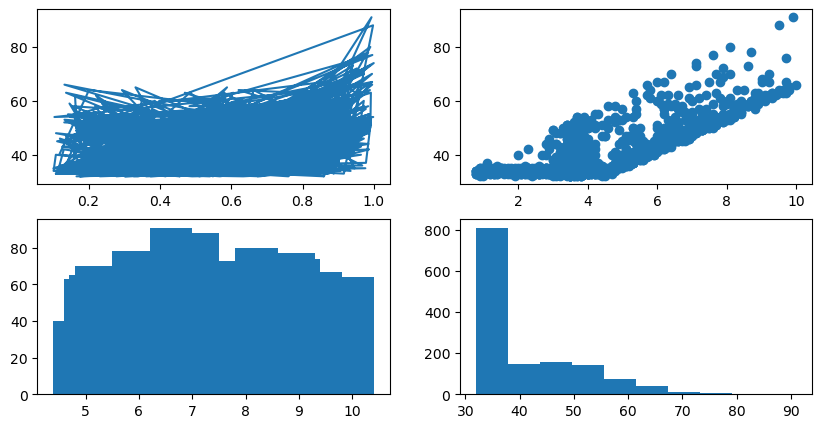

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2,
                                            ncols=2,
                                            figsize=(10, 5))

ax0.plot(student_data["Socioeconomic Score"], student_data["Grades"]);
ax1.scatter(student_data["Study Hours"], student_data["Grades"]);
ax2.bar(student_data["Sleep Hours"], student_data["Grades"]);
ax3.hist(student_data["Grades"], bins=10);

plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Get x and y
x = student_data.drop("Grades", axis=1)
y = student_data["Grades"]

# Split the data in training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Create the instance of model and fit the model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict the test data
model.score(x_test, y_test)

0.7627159773560723

In [13]:
# Calculate the cross_val_score
from sklearn.model_selection import cross_val_score
import numpy as np

np.mean(cross_val_score(model, x, y))

0.7657141007185494

In [14]:
# Calculate mean absolute error
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(x_test)

mean_absolute_error(y_test, y_pred)

3.6563079458985426